# Water Waste Management Project

## Distribution and characteristics of wastewater treatment plants within the global river network
HydroWASTE is a spatially explicit global database of 58,502 wastewater treatment plants (WWTPs) and their characteristics. This database was developed by combining national and regional datasets with auxiliary information to derive or complete missing characteristics, including the amount of people served, the flow rate of effluents, and the level of treatment of processed wastewater. The HydroSHEDS river network with streamflow estimates was used to geo-reference plant outfall locations and to assess the distribution of wastewaters at a global scale. All wastewater treatment plants are co-registered to the global river network of the HydroRIVERS database via their estimated outfall locations.

## Importing Packages and Loading Data
The script first imports several libraries such as pandas, numpy, matplotlib.pyplot, warnings, and plotly.express. It then sets a filter to ignore any warning messages.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Set a filter for ignoring any warning messages
warnings.filterwarnings("ignore")

# Import Plotly Express library and rename it as 'px'
import plotly.express as px

The CSV file is read using pandas' read_csv function, and the data is stored in a DataFrame named 'data'. The code then displays information about the DataFrame, such as the number of rows, columns, and data types of each column.

In [2]:
# Read a CSV file named 'plastics-top-rivers.csv' using pandas' read_csv function,
# and set the input path to the file location
data = pd.read_csv(r'C:\Users\ASUS\Downloads\Hydro Waste.csv')

# Display information about the DataFrame, such as the number of rows, columns, and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58502 entries, 0 to 58501
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WASTE_ID    58502 non-null  int64  
 1   SOURCE      58502 non-null  int64  
 2   ORG_ID      58502 non-null  int64  
 3   WWTP_NAME   53215 non-null  object 
 4   COUNTRY     58502 non-null  object 
 5   CNTRY_ISO   58502 non-null  object 
 6   LAT_WWTP    58502 non-null  float64
 7   LON_WWTP    58502 non-null  float64
 8   QUAL_LOC    58502 non-null  int64  
 9   LAT_OUT     58502 non-null  float64
 10  LON_OUT     58502 non-null  float64
 11  STATUS      58502 non-null  object 
 12  POP_SERVED  58502 non-null  int64  
 13  QUAL_POP    58502 non-null  int64  
 14  WASTE_DIS   58502 non-null  float64
 15  QUAL_WASTE  58502 non-null  int64  
 16  LEVEL       58502 non-null  object 
 17  QUAL_LEVEL  58502 non-null  int64  
 18  DF          47302 non-null  float64
 19  HYRIV_ID    58123 non-nul

## Understanding the Data

In [3]:
# Access the 'shape' attribute of the DataFrame named 'data',
# which returns a tuple representing the number of rows and columns in the DataFrame
data_shape = data.shape

# Print the tuple to display the number of rows and columns in the DataFrame
print("Number of rows and columns in the DataFrame:", data_shape)

Number of rows and columns in the DataFrame: (58502, 25)


In [4]:
# Access the 'head' method of the DataFrame named 'data' and display the first 10 rows of the DataFrame
data_first_10_rows = data.head(10)
print("First 10 rows of the DataFrame:\n", data_first_10_rows)

First 10 rows of the DataFrame:
    WASTE_ID  SOURCE   ORG_ID                       WWTP_NAME    COUNTRY  \
0         1       1  1140441            Akmenes aglomeracija  Lithuania   
1         2       1  1140443          Alytaus m aglomeracija  Lithuania   
2         3       1  1140445           Anyksciu aglomeracija  Lithuania   
3         4       1  1140447          Ariogalos aglomeracija  Lithuania   
4         5       1  1140449         Baisogalos aglomeracija  Lithuania   
5         6       1  1140451  Birstono   Prienu aglomeracija  Lithuania   
6         7       1  1140453              Birzu aglomeracija  Lithuania   
7         8       1  1140455        Druskininku aglomeracija  Lithuania   
8         9       1  1140457           Eisiskiu aglomeracija  Lithuania   
9        10       1  1140459   Elektrenu Vievio aglomeracija  Lithuania   

  CNTRY_ISO  LAT_WWTP  LON_WWTP  QUAL_LOC  LAT_OUT  ...  QUAL_WASTE  \
0       LTU    56.247    22.726         2   56.223  ...           4   

In [5]:
# Access the 'describe' method of the DataFrame named 'data',
# which calculates descriptive statistics of the DataFrame 
# and includes all columns regardless of data type
data.describe()

,WASTE_ID,SOURCE,ORG_ID,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,58502.000000,58502.000000,5.850200e+04,58502.000000,58502.000000,58502.000000,58502.000000,58502.000000,5.850200e+04,58502.000000,5.850200e+04,58502.000000,58502.000000,4.730200e+04,5.812300e+04,47951.000000,58502.000000,58502.000000,4.266700e+04,58502.00000
mean,29251.500000,3.254162,7.594240e+09,35.131096,-14.641072,2.032802,35.128171,-14.639667,3.927373e+04,1.986855,8.916556e+03,2.222762,1.191224,2.792849e+05,4.191372e+07,391.842894,0.178541,0.331801,2.398177e+04,1.95619
std,16888.217061,3.386116,1.502416e+10,22.443167,67.525991,0.637807,22.443336,67.525516,1.536832e+05,0.953141,4.468567e+04,1.453383,0.393269,7.460834e+06,2.329755e+07,5173.557130,0.382971,0.470864,1.215321e+05,0.75870
min,1.000000,1.000000,1.000000e+00,-54.788000,-175.302000,1.000000,-54.798000,-175.302000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000001e+07,0.001000,0.000000,0.000000,0.000000e+00,1.00000
25%,14626.250000,1.000000,4.000250e+03,33.485500,-81.639500,2.000000,33.479000,-81.631000,1.388000e+03,1.000000,3.406870e+02,1.000000,1.000000,1.058800e+02,2.040919e+07,1.718000,0.000000,0.000000,1.022058e+03,1.00000
50%,29251.500000,2.000000,1.296386e+06,41.720500,2.155000,2.000000,41.710000,2.158000,4.613500e+03,2.000000,1.078997e+03,1.000000,1.000000,5.696175e+02,4.018240e+07,6.544000,0.000000,0.000000,4.200000e+03,2.00000
75%,43876.750000,4.000000,1.000290e+09,48.460000,16.650750,2.000000,48.456000,16.676000,1.991100e+04,2.000000,4.428932e+03,4.000000,1.000000,3.784691e+03,7.049991e+07,37.966000,0.000000,1.000000,1.409900e+04,3.00000
max,58502.000000,12.000000,7.800000e+10,71.640000,178.482000,4.000000,71.644000,178.427000,1.014613e+07,4.000000,3.073754e+06,4.000000,2.000000,7.029366e+08,8.032324e+07,127105.248000,1.000000,1.000000,1.120625e+07,3.00000


## Visualizing Country VS Number of waste treatment plants VS Total waste disposed VS total percent of waste disposed
The data is grouped by country and the total waste is calculated for each country. The percentage of waste for each country is also calculated, and the data is sorted by waste percentage in descending order. A new DataFrame is created to count the number of occurrences of each country in the dataset, and the column name is changed to 'plants_total'. The two DataFrames are then merged, and the resulting table is styled using pandas' Styler class. The table is then displayed.

In [6]:
# Increase the maximum number of rows that can be displayed
pd.options.display.max_rows = 188

# Group data by COUNTRY and sum WASTE_DIS
grouped_data = data.groupby(['COUNTRY'])['WASTE_DIS'].sum().reset_index()

# Calculate the percentage of WASTE_DIS for each country
total_waste = grouped_data['WASTE_DIS'].sum()
grouped_data['WASTE_DIS_PERCENT'] = grouped_data['WASTE_DIS'] / total_waste * 100

# Sort the data by WASTE_DIS_PERCENT in descending order
grouped_data = grouped_data.sort_values(by='WASTE_DIS_PERCENT', ascending=False)

# Reset index to start from 1
grouped_data.index = grouped_data.index + 1

# Count the number of occurrences of each country in the dataset
plants = data['COUNTRY'].value_counts()

# Create a new DataFrame with the plants counts
Plants_Total = pd.DataFrame(plants)

# Rename the column 'Country' in the DataFrame to 'plants_total'
renamed_plants_Total_data = Plants_Total.rename(columns={'COUNTRY': 'Plants_Total'})

# Update the original DataFrame with the renamed column
Plants_Total = renamed_plants_Total_data.copy(deep=True) 

# Merge the grouped_data and Plants_Total DataFrames
result = pd.merge(grouped_data, Plants_Total, left_on='COUNTRY', right_index=True)

# Apply formatting and styling to the table
table = result.style \
    .format({'WASTE_DIS': '{:,.0f}', 'WASTE_DIS_PERCENT': '{:.2f}%'}) \
    .hide_index() \
    .set_caption('Total Waste by Country') \
    .set_properties(**{'font-size': '16px', 'text-align': 'center'}) \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '18px')]}]) \
    .background_gradient(cmap='Blues', subset=['WASTE_DIS_PERCENT']) \
    .applymap(lambda x: 'border: 1px solid black', subset=pd.IndexSlice[:, ['COUNTRY', 'WASTE_DIS', 'Plants_Total']])

# Display the table
table

COUNTRY,WASTE_DIS,WASTE_DIS_PERCENT,Plants_Total
United States,"127,162,833",24.38%,14819
China,"93,864,700",17.99%,2486
India,"23,288,060",4.46%,816
Germany,"22,862,635",4.38%,4257
Japan,"21,305,338",4.08%,378
United Kingdom,"15,668,621",3.00%,1887
Canada,"15,355,391",2.94%,2064
Italy,"15,284,406",2.93%,4090
South Korea,"13,976,201",2.68%,87
France,"12,779,917",2.45%,3622


## Analyzing COUNTRY vs WASTE DISPOSED by the COUNTRY
The data is then plotted using a bar chart. The data is grouped by country and the total waste is calculated for each country. The top 50% and bottom 50% of the data are plotted separately on two subplots. The x-axis labels and tick labels are set, the y-axis label and titles are set, and the subplots are given a common title. Gridlines are added to both subplots.

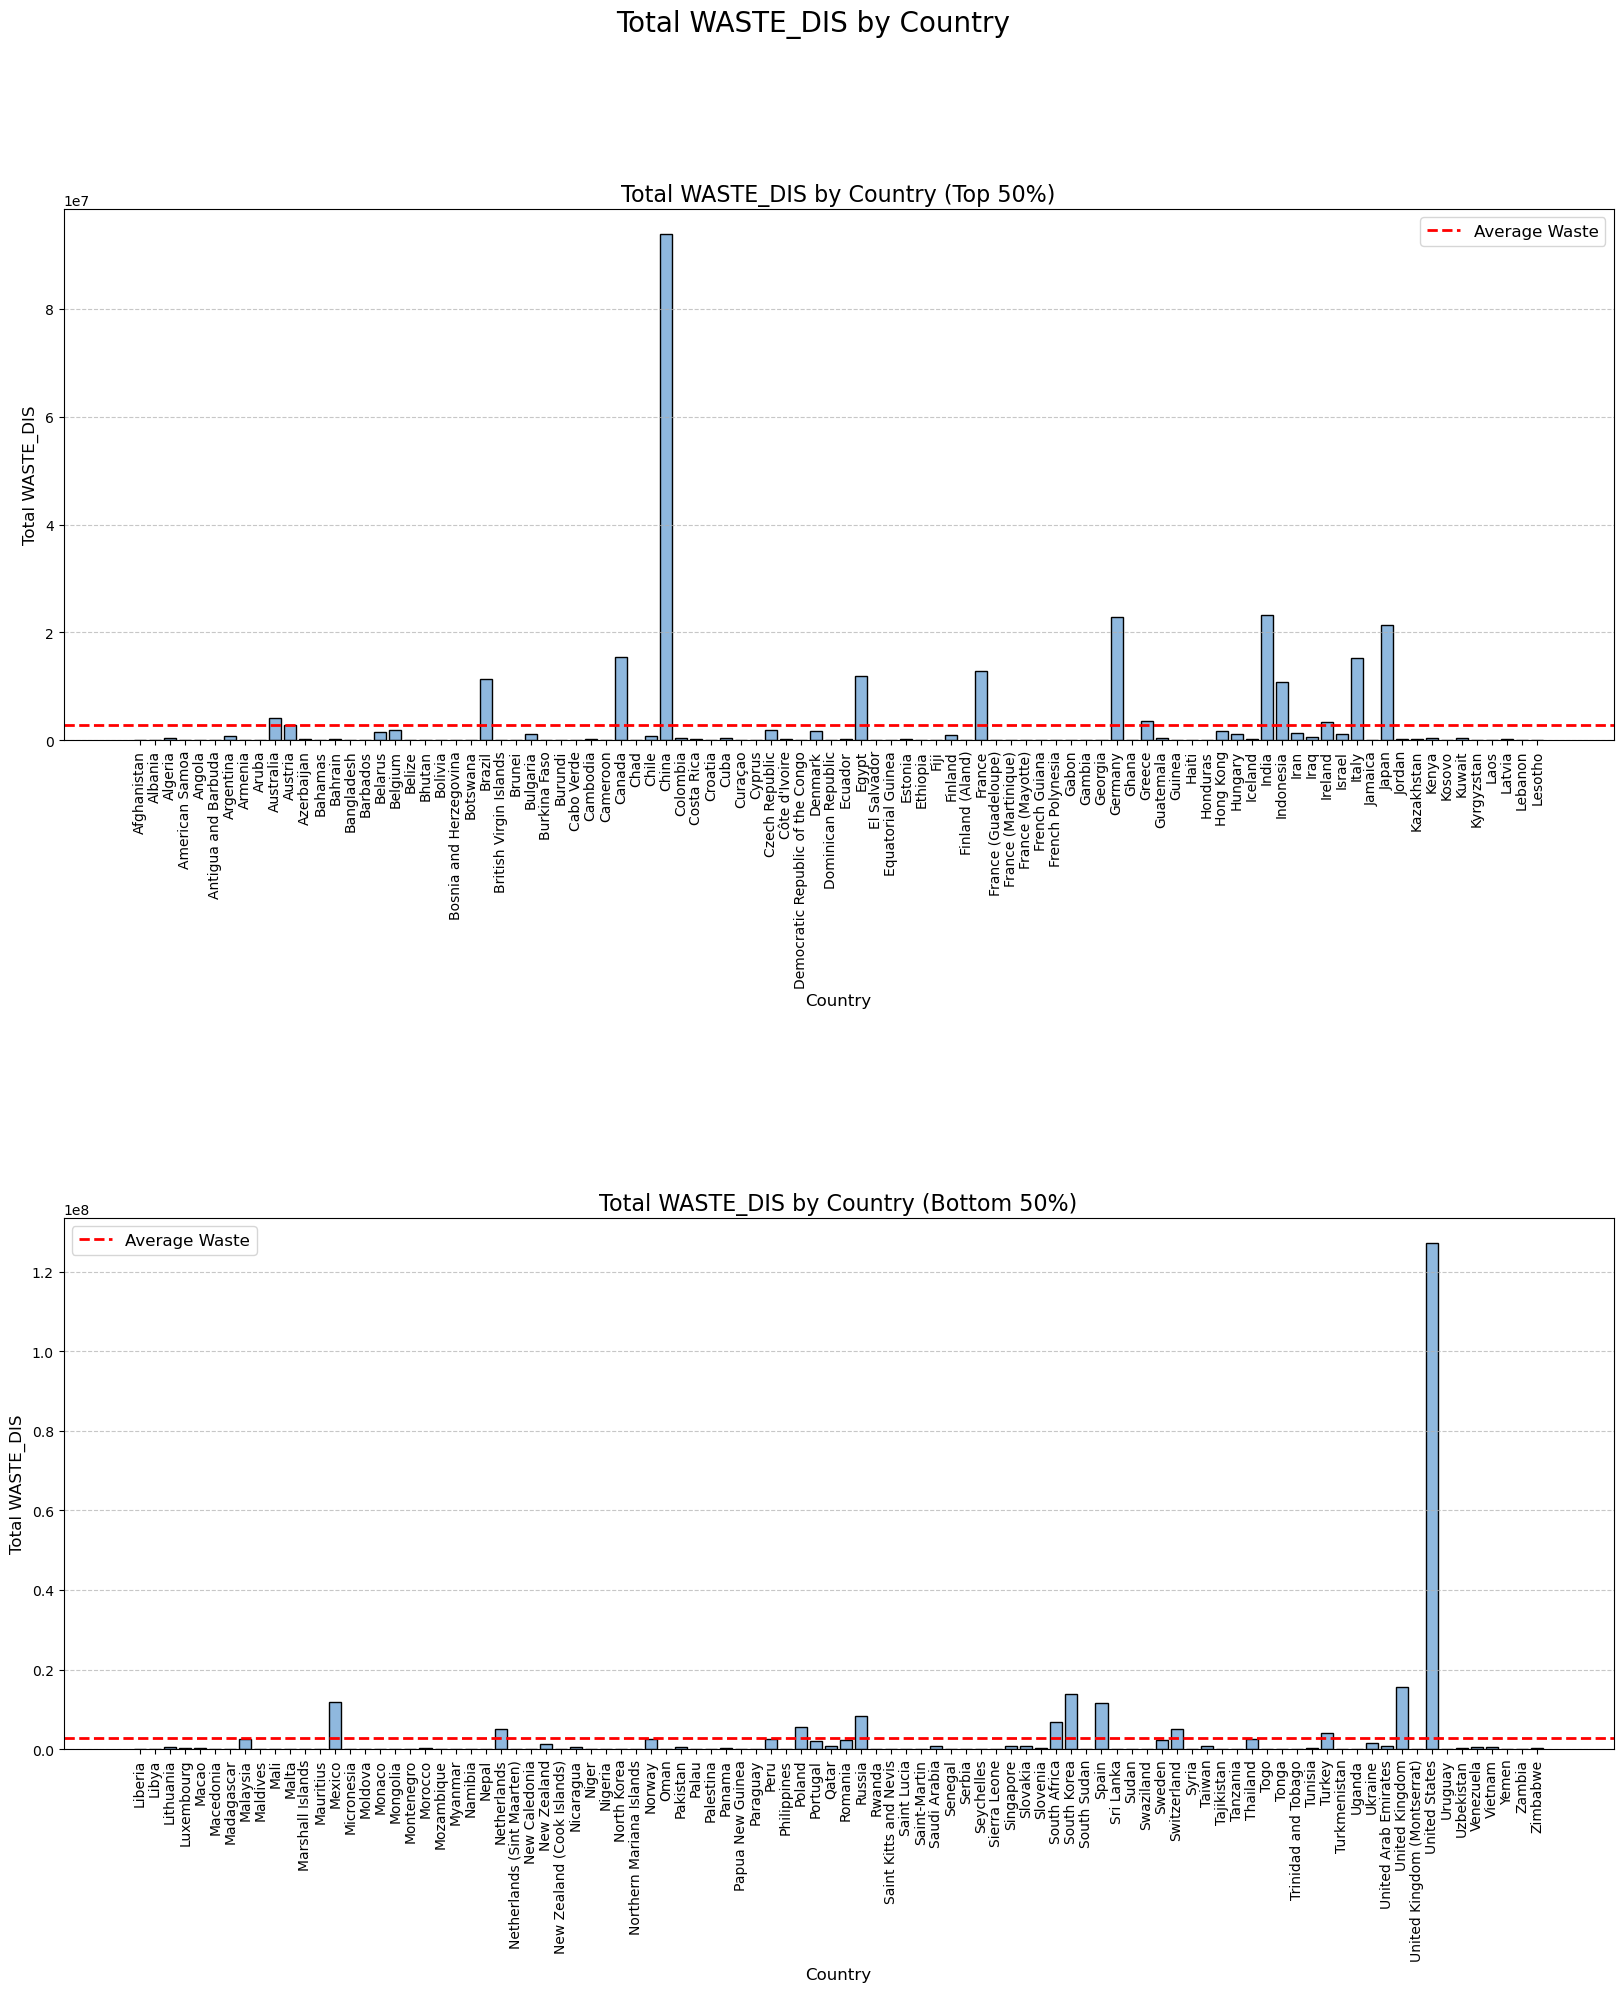

In [8]:
# group data by COUNTRY and sum WASTE_DIS
grouped_data = data.groupby(['COUNTRY'])['WASTE_DIS'].sum().reset_index()

# plot bar chart
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
ax1.bar(grouped_data['COUNTRY'][:len(grouped_data)//2], grouped_data['WASTE_DIS'][:len(grouped_data)//2], color='#8FB8DE', edgecolor='black', linewidth=1)
ax2.bar(grouped_data['COUNTRY'][len(grouped_data)//2:], grouped_data['WASTE_DIS'][len(grouped_data)//2:], color='#8FB8DE', edgecolor='black', linewidth=1)

# set x-axis labels and tick labels, and adjust padding
x_labels1 = grouped_data['COUNTRY'][:len(grouped_data)//2]
x_labels2 = grouped_data['COUNTRY'][len(grouped_data)//2:]
ax1.set_xticklabels(x_labels1, rotation=90, fontsize=10)  # increase fontsize to 16
ax2.set_xticklabels(x_labels2, rotation=90, fontsize=10)  # increase fontsize to 16
ax1.set_ylabel('Total WASTE_DIS', fontsize=12)
ax2.set_ylabel('Total WASTE_DIS', fontsize=12)
ax1.set_title('Total WASTE_DIS by Country (Top 50%)', fontsize=16)
ax2.set_title('Total WASTE_DIS by Country (Bottom 50%)', fontsize=16)

# add labels and title
fig.suptitle('Total WASTE_DIS by Country', fontsize=20)
ax1.set_xlabel('Country', fontsize=12)
ax2.set_xlabel('Country', fontsize=12)

# add grid
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# add legend and horizontal line
avg_waste = grouped_data['WASTE_DIS'].mean()
ax1.axhline(avg_waste, color='red', linewidth=2, linestyle='--', label='Average Waste')
ax2.axhline(avg_waste, color='red', linewidth=2, linestyle='--', label='Average Waste')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

# adjust spacing between subplots to prevent overlap
plt.subplots_adjust(hspace=0.9)

# display chart
plt.show()

## Conclusion
In conclusion, water treatment plants play a crucial role in ensuring that the water we consume is safe and free from harmful contaminants. Across the world, many countries have invested in water treatment plants to provide clean and safe water for their citizens.

However, despite these efforts, many people still lack access to clean water due to various factors such as lack of infrastructure, poor management, and inadequate resources. There is a need for continued investment in water treatment plants, particularly in developing countries where access to clean water is still a major challenge.

Additionally, there is a need for increased awareness among the public on the importance of water conservation and reducing pollution to minimize the need for extensive water treatment. Overall, water treatment plants are an essential aspect of ensuring safe and clean water for communities across the world.